# Movie Review Sentiment Analysis Using LSTM

#### This project aims to perform sentiment analysis on movie reviews using a Long Short-Term Memory (LSTM) neural network.
###### By leveraging the IMDB dataset, which contains labeled positive and negative reviews, the model is trained to classify the sentiment of new reviews.
###### The data preprocessing steps include tokenization and padding of text data. The LSTM model is trained and evaluated using accuracy, confusion matrix, and classification report metrics. 
###### The project also includes visualizations of training and validation loss and accuracy to provide insights into the model's performance.

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Loading the Dataset

In [2]:
data = pd.read_csv("IMDB Dataset.csv")

In [3]:
data.shape

(50000, 2)

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [11]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### Data Preprocessing - Mapping Sentiments

In [13]:
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34524\2568826810.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [15]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [17]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

### Preparing Training and Testing Sets

In [19]:
# split data into training data and test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [21]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


### Data Preprocessing - Tokenization and Padding

In [23]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [24]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [25]:
print(X_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [26]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [27]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


 ### Building the LSTM Model - Long Short-Term Memory

In [34]:
# build the model

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Defining the optimiser and the loss function for the model

In [38]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

## Training the Model

In [43]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 92ms/step - accuracy: 0.8669 - loss: 0.3311 - val_accuracy: 0.8438 - val_loss: 0.3714
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 92ms/step - accuracy: 0.8758 - loss: 0.3068 - val_accuracy: 0.8658 - val_loss: 0.3195
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 92ms/step - accuracy: 0.8980 - loss: 0.2572 - val_accuracy: 0.7161 - val_loss: 0.6434
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 92ms/step - accuracy: 0.8508 - loss: 0.3515 - val_accuracy: 0.8635 - val_loss: 0.3226
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 93ms/step - accuracy: 0.9116 - loss: 0.2299 - val_accuracy: 0.8602 - val_loss: 0.3318
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 93ms/step - accuracy: 0.9266 - loss: 0.1900 - val_accuracy: 0.8712 - val_loss: 0.3317
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 95ms/step - accuracy: 0.9380 - loss: 0.1616 - val_accuracy: 0.8754 - val_loss: 0.3446
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 46s 93ms/step - accuracy: 0.9499 - loss: 0.1412 - 

In [45]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8698 - loss: 0.6330
Test Loss: 0.6197720170021057
Test Accuracy: 0.8725000023841858


In [47]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int)



313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


### Evaluating the Model - Accuracy

In [49]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8725


### Evaluating the Model - Confusion Matrix


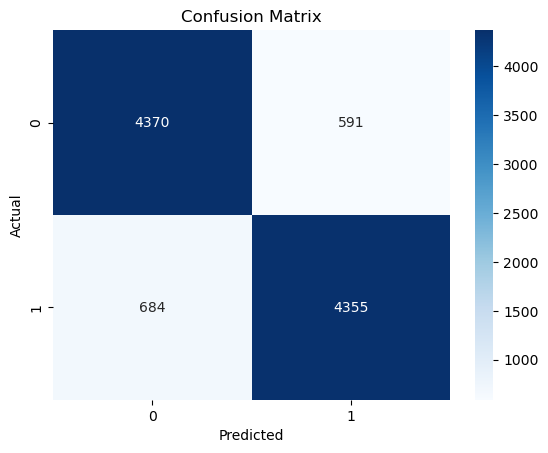

In [51]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Evaluating the Model - Classification Report

In [53]:
class_report = classification_report(Y_test, Y_pred, target_names=['Negative', 'Positive'])
print(class_report)


              precision    recall  f1-score   support

    Negative       0.86      0.88      0.87      4961
    Positive       0.88      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### Plotting Training and Validation Loss

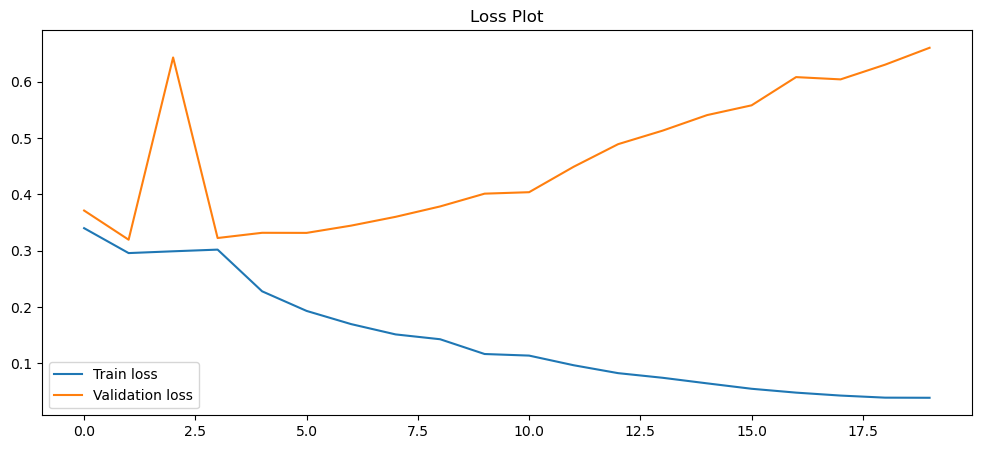

In [55]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss Plot')
plt.show()


### Plotting Training and Validation Accuracy

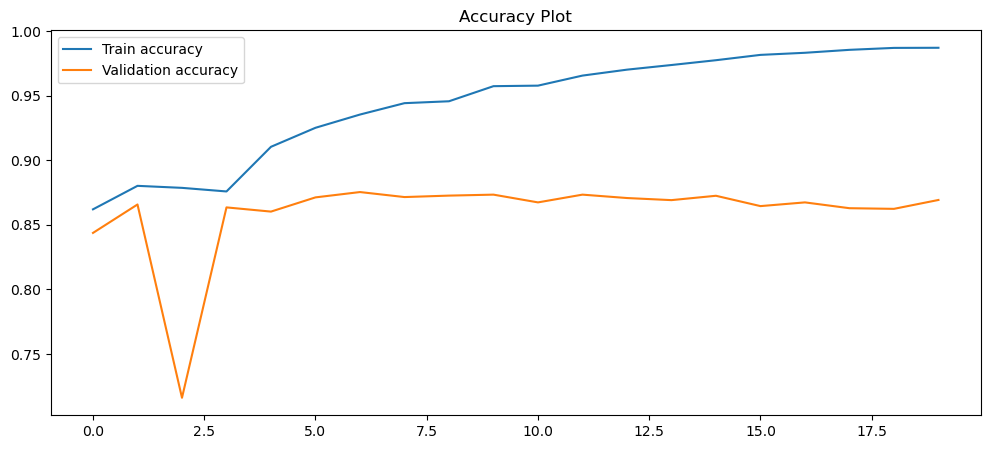

In [57]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.title('Accuracy Plot')
plt.show()


### Defining Function for making predictions

In [59]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [ ]:
### Makin

In [61]:
# example usage
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The sentiment of the review is: positive


In [63]:
# example usage
new_review = "This movie was ok but not that good."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The sentiment of the review is: negative


In [65]:
new_review = "This movie was not that good"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The sentiment of the review is: negative


In [67]:
new_review = "pathetic acting waste of money"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The sentiment of the review is: negative


In [71]:
# example usage
new_review = "This movie was 1/10"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The sentiment of the review is: negative


In [73]:
# example usage
new_review = "must watch"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The sentiment of the review is: positive
